# Digital Signal Processing

Many problems in DSP require an integer index which can be negative. This can be implemented using two arrays: one index array and a second values arrays. 

First, we will look at some common sequences using a non-negative index.

## Common Sequences

In [260]:
import numpy
from numpy import array
import numpy as np

In [261]:
def unit_impulse(size, position):
    if position > size:
        return None
    result = np.zeros(size)
    result[position] = 1
    return result

unit_impulse(7, 2)

array([0., 0., 1., 0., 0., 0., 0.])

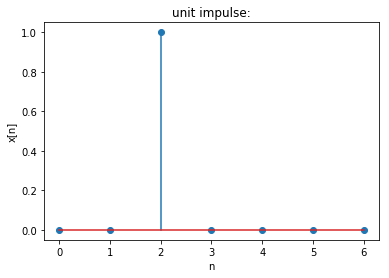

In [262]:
from matplotlib import pyplot as plt

def plot_sequence(sequence, size=None, title=None):
    if not size:
        xs = np.arange(7)
    else:
        xs = np.arange(size)
    ys = sequence
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title(title)
    plt.stem(xs, ys);

name = 'unit impulse'
plot_sequence(unit_impulse(7, 2), title=f'{name}:')

In [263]:
def unit_step(size, position):
    result = np.zeros(size)
    for i in range(size):
        if i>= position:
            result[i] = 1
    return result

unit_step(7, 2)

array([0., 0., 1., 1., 1., 1., 1.])

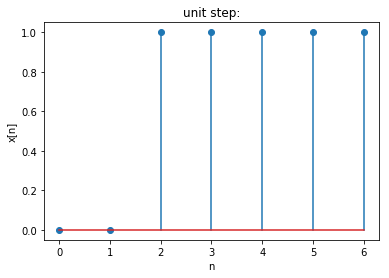

In [264]:
name = 'unit step'
plot_sequence(unit_step(7, 2), title=f'{name}:')

In [265]:
def real_exponential(size, A=1, a=0.1):
    indices = np.arange(size)
    result = A * (a ** indices)
    return result

real_exponential(7, a=0.9)

array([1.      , 0.9     , 0.81    , 0.729   , 0.6561  , 0.59049 ,
       0.531441])

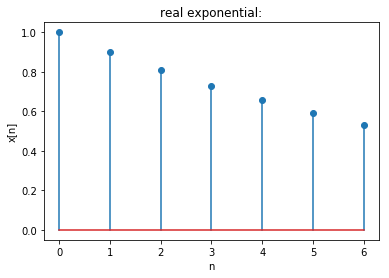

In [266]:
name = 'real exponential'
plot_sequence(real_exponential(7, a=0.9), title=f'{name}:')

In [267]:
def complex_exponential(size, A=1, sigma=1, omega=1):
    indices = np.arange(size)
    result = A * np.exp((sigma + omega * 1j) * indices)
    return result

complex_exponential(7, sigma=0.1)

array([ 1.        +0.j        ,  0.5971264 +0.92996926j,
       -0.50828289+1.11061839j, -1.33635009+0.19049209j,
       -0.9751217 -1.12901665j,  0.46767988-1.58099885j,
        1.74954433-0.50912823j])

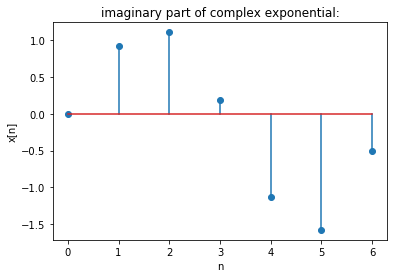

In [268]:
name = 'imaginary part of complex exponential'
plot_sequence(complex_exponential(7, sigma=0.1).imag, title=f'{name}:')

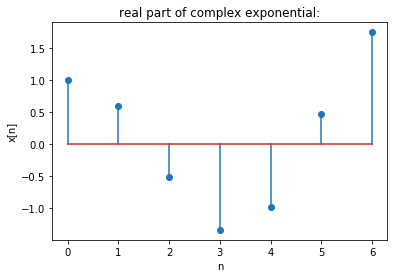

In [269]:
name = 'real part of complex exponential'
plot_sequence(complex_exponential(7, sigma=0.1).real, title=f'{name}:')

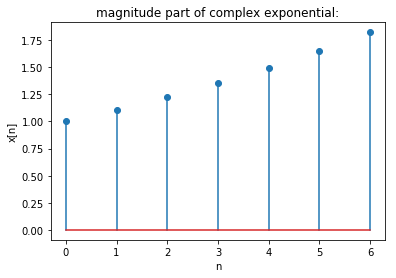

In [270]:
name = 'magnitude part of complex exponential'
plot_sequence(np.abs(complex_exponential(7, sigma=0.1)), title=f'{name}:')

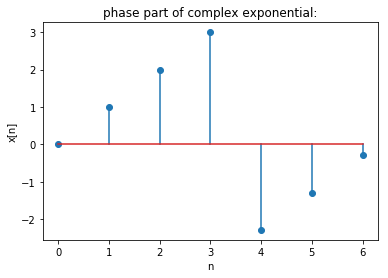

In [271]:
name = 'phase part of complex exponential'
plot_sequence(np.angle(complex_exponential(7, sigma=0.1)), title=f'{name}:')

In [272]:
def periodic(sequence, period):
    result = []
    for i in range(period):
        result.append(sequence)
    return np.ndarray.flatten(array(result))

sequence = array([0., 1., 2., 3., 4., 5., 6.])

periodic(sequence, 3)

array([0., 1., 2., 3., 4., 5., 6., 0., 1., 2., 3., 4., 5., 6., 0., 1., 2.,
       3., 4., 5., 6.])

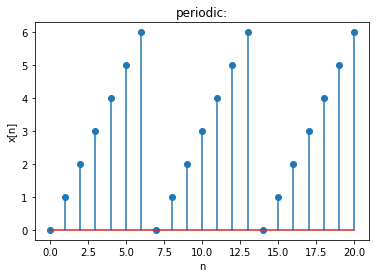

In [273]:
name = 'periodic'
plot_sequence(periodic(sequence, 3), size=21, title=f'{name}:')

## Operations on Sequences

In [274]:
def add(signal1, signal2):
    return signal1 + signal2

add(sequence, sequence)

array([ 0.,  2.,  4.,  6.,  8., 10., 12.])

In [275]:
def multiply(signal1, signal2):
    return signal1 * signal2

multiply(sequence, sequence)

array([ 0.,  1.,  4.,  9., 16., 25., 36.])

In [276]:
def scale(signal, scale_factor):
    return scale_factor * signal

signal_scale(sequence, 2)

array([ 0.,  2.,  4.,  6.,  8., 10., 12.])

In [277]:
def shift(xs, n):
    e = np.empty_like(xs)
    if n >= 0:
        e[:n] = 0
        e[n:] = xs[:-n]
    else:
        e[n:] = 0
        e[:n] = xs[-n:]
    return e

shift(sequence, 2)

array([0., 0., 0., 1., 2., 3., 4.])

In [278]:
shift(arr, -1)

array([1., 2., 3., 4., 5., 6., 0.])

In [279]:
def sample_sum(sequence, start, end):
    return np.sum(sequence[start:end+1])

sample_sum(sequence, 2, 7)

20.0

In [280]:
def sample_product(sequence, start, end):
    return np.prod(sequence[start:end+1])

sample_product(sequence, 2, 7)

720.0

In [281]:
def energy(sequence):
    return np.sum(np.square(np.abs(sequence)))

energy(sequence)

91.0

In [282]:
np.flip(sequence)

array([6., 5., 4., 3., 2., 1., 0.])

In [283]:
def flip_and_shift(xs, shift_amount):
    return shift(np.flip(xs), shift_amount)

flip_and_shift(sequence, 1)

array([0., 6., 5., 4., 3., 2., 1.])

In [284]:
def decimate(xs, decimation_factor):
    return xs[::decimation_factor] 

decimate(sequence, 2)

array([0., 2., 4., 6.])

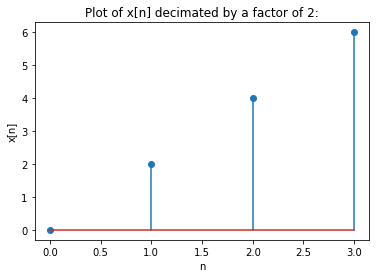

In [285]:
# sub-sample every second element
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Plot of x[n] decimated by a factor of 2:')
decimated = decimate(sequence, 2)
adjusted_xs = np.arange(decimated.size)
plt.stem(adjusted_xs, decimated);

In [286]:
def expand(xs, expansion_factor):
    result = []
    size = xs.size
    for i in range(size):
        if i % expansion_factor == 0:
            index = int(i / expansion_factor)
            value = xs[index]
        else:
            value = 0
        result.append(value)
    return array(result)

expand(sequence, 2)

array([0., 0., 1., 0., 2., 0., 3.])

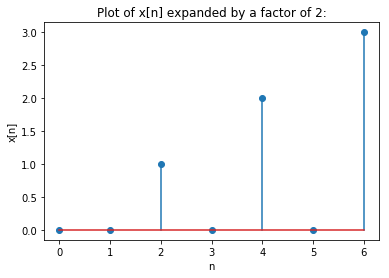

In [287]:
# zero out every second element
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Plot of x[n] expanded by a factor of 2:')
expanded = expand(sequence, 2)
expanded_xs = np.arange(expanded.size)
plt.stem(expanded_xs, expanded);

In [288]:
# any sequence can be decomposed into a linear combination of 
# unit impulse functions

x = array([1., 2., 3.])
x[0] * unit_impulse(3, 0) + x[1] * unit_impulse(3, 1) + x[2] * unit_impulse(3, 2)

array([1., 2., 3.])

In [289]:
def synthesize(xs):
    size = xs.size
    result = np.zeros(size)
    for i in range(size):
        value = xs[i]
        result += value * unit_impulse(size, i)
    return result

synthesize(x)

array([1., 2., 3.])

In [290]:
x * unit_impulse(3, 2)

array([0., 0., 3.])

In [291]:
# unit step is sum of unit impulses
unit_impulse(3, 0) + unit_impulse(3, 1) + unit_impulse(3, 2) 

array([1., 1., 1.])

In [292]:
# unit impulse is the difference between unit steps 
unit = unit_step(3, 0)
unit - shift(unit, 1)

array([1., 0., 0.])

In [293]:
shift(unit, 1) - shift(unit, 2)

array([0., 1., 0.])

In [294]:
shift(unit, 2) - shift(unit, 3)

array([0., 0., 1.])

In [295]:
# unit step can be used as a switch 
# this switch turns off all values before index 3 
switch = shift(unit_step(7, 0), 3)
xs * switch

array([0., 0., 0., 0., 1., 0., 0.])

In [296]:
def pulse(size, suffix_size):
    '''returns a pulse of size `size` with `suffix size` ones. '''
    unit_1 = unit_step(size, 0)
    unit_2 = shift(unit_1, -suffix_size)
    return unit_1 - unit_2
    
pulse(7, 3)

array([0., 0., 0., 0., 1., 1., 1.])

In [297]:
# multiplication by a pulse acts as a selective switch
xs * pulse(7, 3)

array([0., 0., 0., 0., 1., 0., 0.])

## Aliasing

In the case of a discrete sequences, there are usually many different continuous sinusoids that can fit the same set of points. This phenomenon is called *aliasing*.

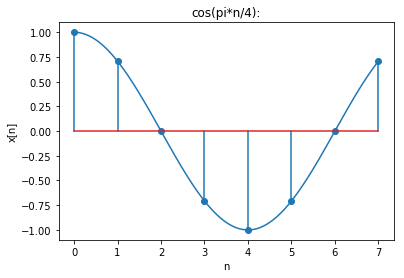

In [298]:
x = np.arange(8)
y = np.cos((np.pi * x) / 4)

xs = np.linspace(0, 7, 500)
ys = np.cos((np.pi * xs) / 4)

plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('cos(pi*n/4):')

plt.plot(xs, ys)
plt.stem(x, y);

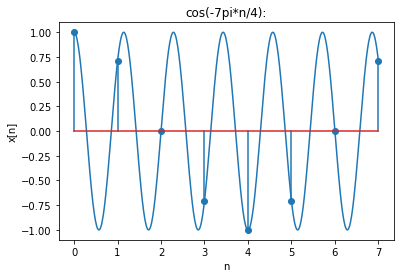

In [299]:
x = np.arange(8)
y = np.cos((-7*np.pi * x) / 4)

xs = np.linspace(0, 7, 500)
ys = np.cos((-7*np.pi * xs) / 4)

plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('cos(-7pi*n/4):')

plt.plot(xs, ys)
plt.stem(x, y);

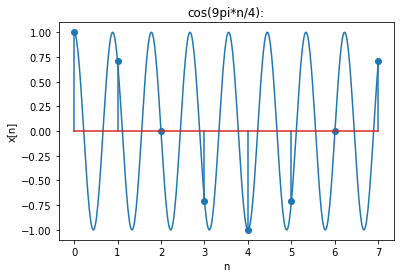

In [300]:
x = np.arange(8)
y = np.cos((np.pi * x) / 4)

xs = np.linspace(0, 7, 500)
ys = np.cos((9 * np.pi * xs) / 4)

plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('cos(9pi*n/4):')

plt.plot(xs, ys)
plt.stem(x, y);

## General Sequences and Operations

Above, we saw how to implement various sequences and operations using a non-negatvie index.

We will now generalize these sequences and operations to use an integer index.

Negative inexes become useful when we factor a sequence into its even and odd components.

In [319]:
def unit_impulse(left, right, index):
    indexes = np.arange(left, right+1)
    mask = indexes - index == 0
    return indexes, mask.astype(int)

unit_impulse_integers(-3, 3, -2)

(array([-3, -2, -1,  0,  1,  2,  3]), array([0, 1, 0, 0, 0, 0, 0]))

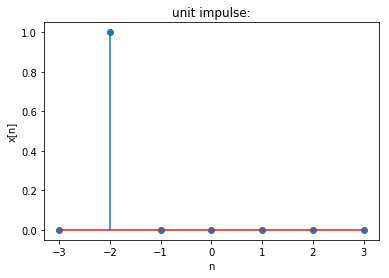

In [320]:
def plot_sequence(sequences, size=None, title=None):
    indexes = sequences[0]
    values = sequences[1]
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title(title)
    plt.stem(indexes, values);

name = 'unit impulse'
plot_sequence(unit_impulse(-3, 3, -2), title=f'{name}:')

In [321]:
def unit_step(left, right, index):
    indexes = np.arange(left, right+1)
    mask = indexes - index >= 0
    return indexes, mask.astype(int)

unit_step(-3, 3, -1)

(array([-3, -2, -1,  0,  1,  2,  3]), array([0, 0, 1, 1, 1, 1, 1]))

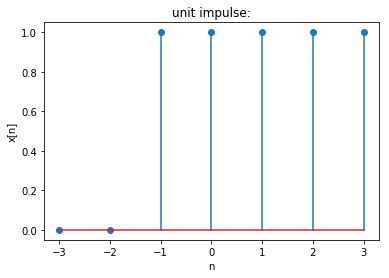

In [323]:
name = 'unit impulse'
plot_sequence(unit_step(-3, 3, -1), title=f'{name}:')

In [326]:
def real_exponential(left, right, size, A=1, a=0.1):
    indexes = np.arange(left, right+1)
    result = A * (a ** indexes)
    return indexes, result

real_exponential(-3, 3, 7, a=0.9)

(array([-3, -2, -1,  0,  1,  2,  3]),
 array([1.37174211, 1.2345679 , 1.11111111, 1.        , 0.9       ,
        0.81      , 0.729     ]))

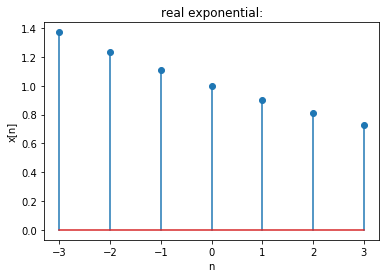

In [327]:
name = 'real exponential'
plot_sequence(real_exponential(-3, 3, 7, a=0.9), title=f'{name}:')

In [328]:
def complex_exponential(left, right, size, A=1, sigma=1, omega=1):
    indexes = np.arange(left, right+1)
    result = A * np.exp((sigma + omega * 1j) * indexes)
    return indexes, result

complex_exponential(-3, 3, 7, sigma=0.1)

(array([-3, -2, -1,  0,  1,  2,  3]),
 array([-0.73340448-0.10454427j, -0.34071221-0.74446977j,
         0.48888574-0.76139443j,  1.        +0.j        ,
         0.5971264 +0.92996926j, -0.50828289+1.11061839j,
        -1.33635009+0.19049209j]))

In [332]:
def add(indexes, sequence_1, sequence_2):
    return indexes, sequence_1 + sequence_2

indexes = np.arange(-3, 4, 1)
sequence = np.arange(7)
add(indexes, sequence, sequence)

(array([-3, -2, -1,  0,  1,  2,  3]), array([ 0,  2,  4,  6,  8, 10, 12]))

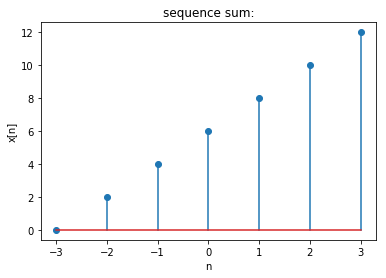

In [333]:
name = 'sequence sum'
plot_sequence(add(index, sequence, sequence), title=f'{name}:')

In [334]:
def multiply(indexes, sequence_1, sequence_2):
    return indexes, sequence_1 + sequence_2

indexes = np.arange(-3, 4, 1)
sequence = np.arange(7)
multiply(indexes, sequence, sequence)

(array([-3, -2, -1,  0,  1,  2,  3]), array([ 0,  2,  4,  6,  8, 10, 12]))

In [339]:
def scale(indexes, sequence, scale_factor):
    return indexes, scale_factor * sequence

indexes = np.arange(-3, 4, 1)
sequence = np.arange(7)
scale(indexes, sequence, 2)

(array([-3, -2, -1,  0,  1,  2,  3]), array([ 0,  2,  4,  6,  8, 10, 12]))

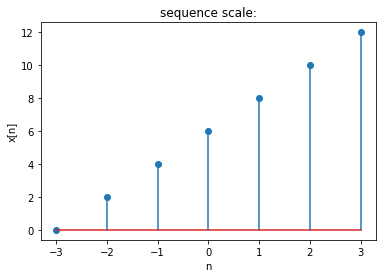

In [341]:
name = 'sequence scale'
plot_sequence(scale(indexes, sequence, 2), title=f'{name}:')

In [357]:
def shift(indexes, sequence, n):
    e = np.empty_like(sequence)
    if n >= 0:
        e[:n] = 0
        e[n:] = sequence[:-n]
    else:
        e[n:] = 0
        e[:n] = sequence[-n:]
    return indexes, e

indexes = np.arange(-3, 4)
values = np.arange(7)
shift(indexes, sequence, 2)

(array([-3, -2, -1,  0,  1,  2,  3]), array([0, 0, 0, 1, 2, 3, 4]))

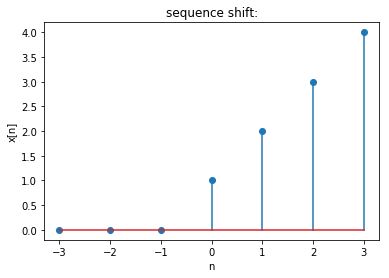

In [347]:
name = 'sequence shift'
plot_sequence(shift(indexes, sequence, 2), title=f'{name}:')

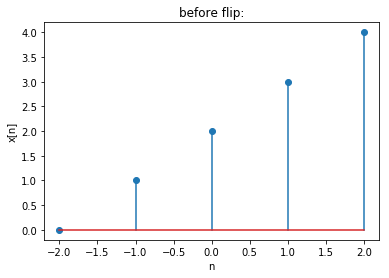

In [374]:
def flip(indexes, sequence):
    return indexes, np.flip(sequence)

indexes = np.arange(-2, 3)
values = np.arange(5)

name = 'before flip'
plot_sequence((indexes, values), title=f'{name}:')

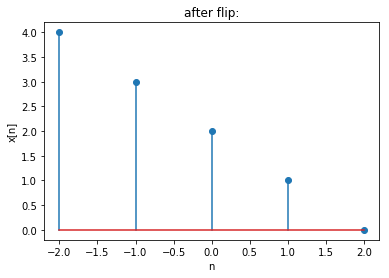

In [375]:
name = 'after flip'
plot_sequence(flip(indexes, values), title=f'{name}:')

we can use the flip operation to factor a sequence into its even and odd components:

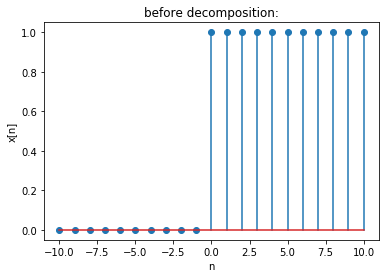

In [406]:
def even_odd(indexes, sequence):
    flipped = flip(indexes, sequence)
    negated_flipped = flip(indexes, -1 * sequence)
    
    sum_1 = add(indexes, sequence, flipped)[1]
    sum_2 = add(indexes, sequence, negated_flipped)[1]
    
    even = 0.5 * sum_1[1]
    odd = 0.5 * sum_2[1]
    return even, odd

indexes = np.arange(-10, 11, 1)
values = unit_step(-10, 10, 0)[1]

name = 'before decomposition'
plot_sequence((indexes, values), title=f'{name}:')

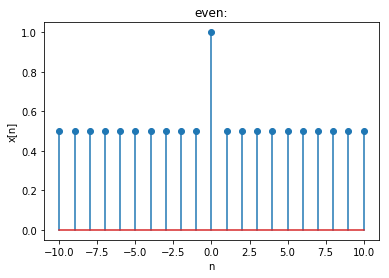

In [405]:
even, odd = even_odd(indexes, values)

name = 'even'
plot_sequence((indexes, even), title=f'{name}:')

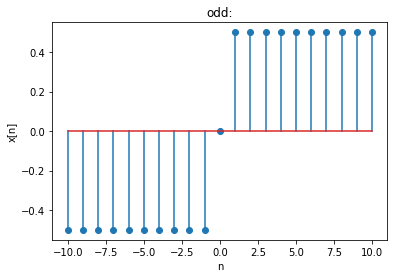

In [402]:
name = 'odd'
plot_sequence((indexes, odd), title=f'{name}:')

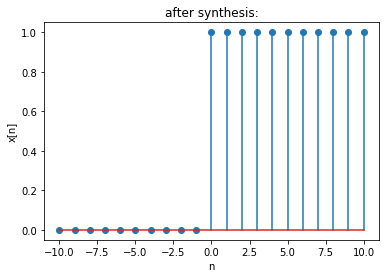

In [409]:
reconstructed = add(indexes, even, odd)

name = 'after synthesis'
plot_sequence(reconstructed, title=f'{name}:')

In [410]:
def flip_and_shift(indexes, sequence, n):
    xs, ys = flip(indexes, sequence)
    return shift(xs, ys, n)

indexes = np.arange(-2, 3)
values = np.arange(5)
flip_and_shift(indexes, values, 2)

(array([-2, -1,  0,  1,  2]), array([0, 0, 4, 3, 2]))

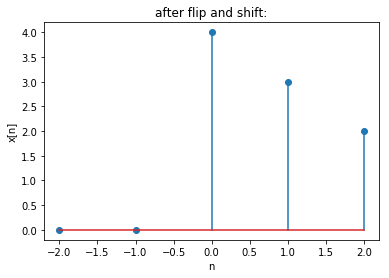

In [411]:
name = 'after flip and shift'
plot_sequence(flip_and_shift(indexes, values, 2), title=f'{name}:')